In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os 

In [5]:
zip_path = r"C:\Users\ncc333\Downloads\wine+quality.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    #zip_ref.extractall("Datasets")


File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [7]:
with zipfile.ZipFile(zip_path) as z:
    with z.open('winequality-red.csv') as f:
        red_wine = pd.read_csv(f,sep = ";")

In [10]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
#pick out the numerical columns and get the discription
num_features = red_wine.select_dtypes(include = ['int64', 'float64'] ).columns
red_wine[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [12]:
red_wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
def map_quality_category(x):
    if x <= 4:
        return 'Low'
    elif x <= 6:
        return 'Medium'
    else:
        return 'High'

    red_wine['quality_label'] = red_wine['quality'].apply(map_quality_category)

In [14]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df = red_wine.copy()

In [23]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

     # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

        # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: fixed acidity
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis: 1.132


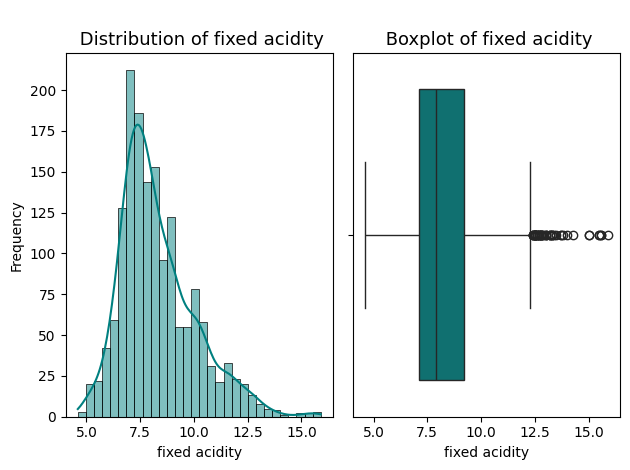

fixed acidity is moderately skewed.


In [24]:
# 1. Fixed Acidity
univariate_numerical_eda(df, 'fixed acidity')

In [30]:
#pick out the numerical columns and get the discription
num_features = df.select_dtypes(include = ['int64', 'float64'] ).columns
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


 Feature: fixed acidity
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis: 1.132


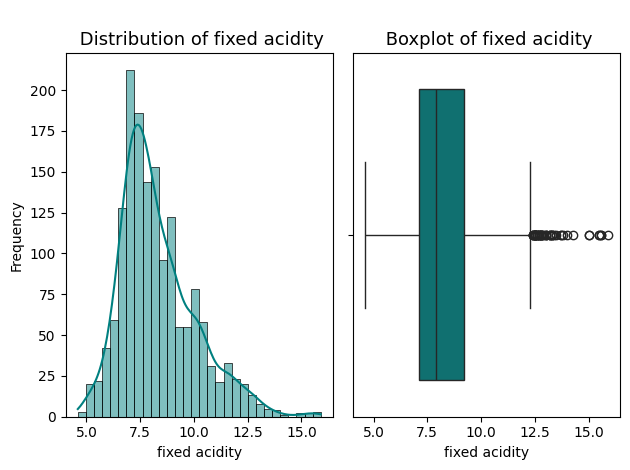

fixed acidity is moderately skewed.
 Feature: volatile acidity
       volatile acidity
count       1599.000000
mean           0.527821
std            0.179060
min            0.120000
25%            0.390000
50%            0.520000
75%            0.640000
max            1.580000

Skewness: 0.672
Kurtosis: 1.226


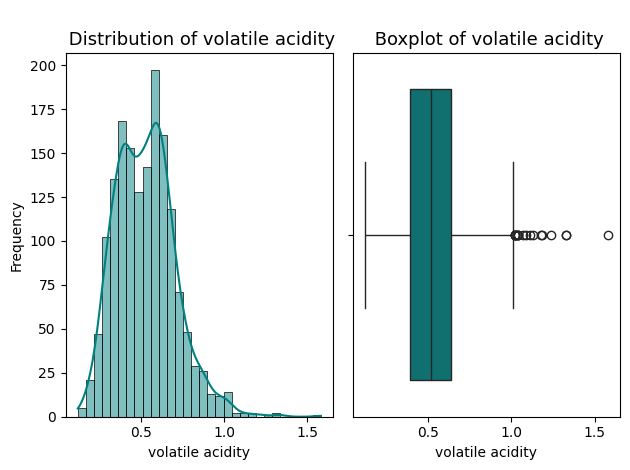

volatile acidity is moderately skewed.
 Feature: citric acid
       citric acid
count  1599.000000
mean      0.270976
std       0.194801
min       0.000000
25%       0.090000
50%       0.260000
75%       0.420000
max       1.000000

Skewness: 0.318
Kurtosis: -0.789


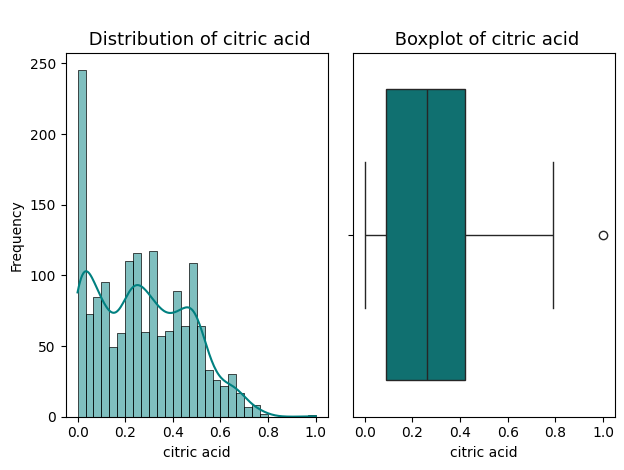

citric acid is fairly symmetric.
 Feature: residual sugar
       residual sugar
count     1599.000000
mean         2.538806
std          1.409928
min          0.900000
25%          1.900000
50%          2.200000
75%          2.600000
max         15.500000

Skewness: 4.541
Kurtosis: 28.618


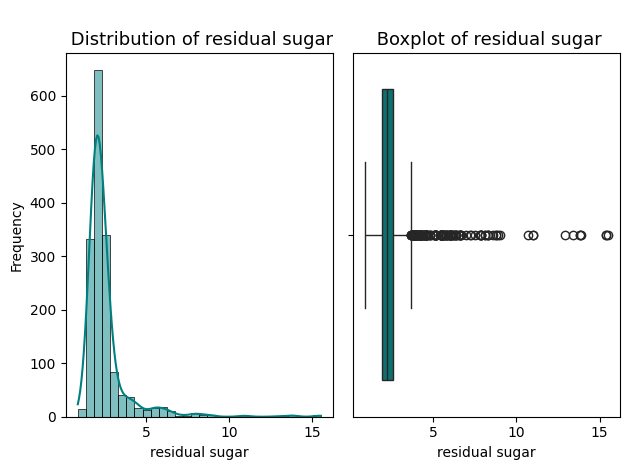


 residual sugar is highly skewed. Consider log or Box-Cox transformation.
 Feature: chlorides
         chlorides
count  1599.000000
mean      0.087467
std       0.047065
min       0.012000
25%       0.070000
50%       0.079000
75%       0.090000
max       0.611000

Skewness: 5.680
Kurtosis: 41.716


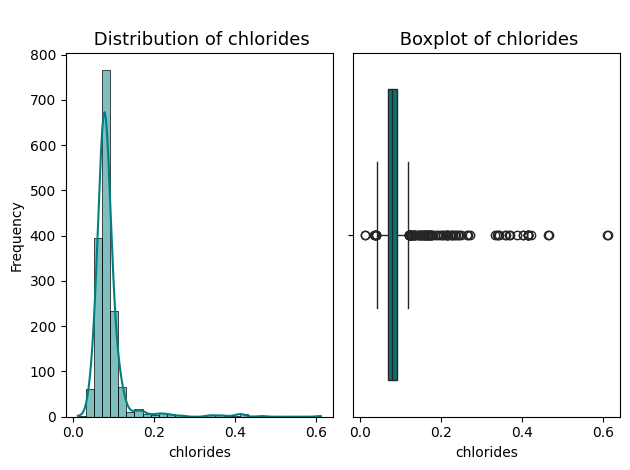


 chlorides is highly skewed. Consider log or Box-Cox transformation.
 Feature: free sulfur dioxide
       free sulfur dioxide
count          1599.000000
mean             15.874922
std              10.460157
min               1.000000
25%               7.000000
50%              14.000000
75%              21.000000
max              72.000000

Skewness: 1.251
Kurtosis: 2.024


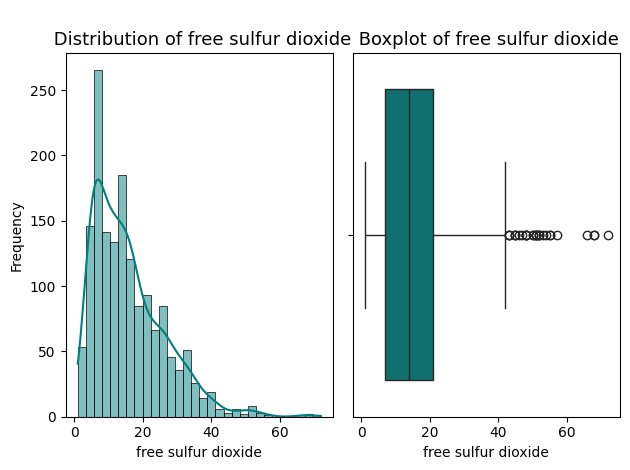


 free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
 Feature: total sulfur dioxide
       total sulfur dioxide
count           1599.000000
mean              46.467792
std               32.895324
min                6.000000
25%               22.000000
50%               38.000000
75%               62.000000
max              289.000000

Skewness: 1.516
Kurtosis: 3.810


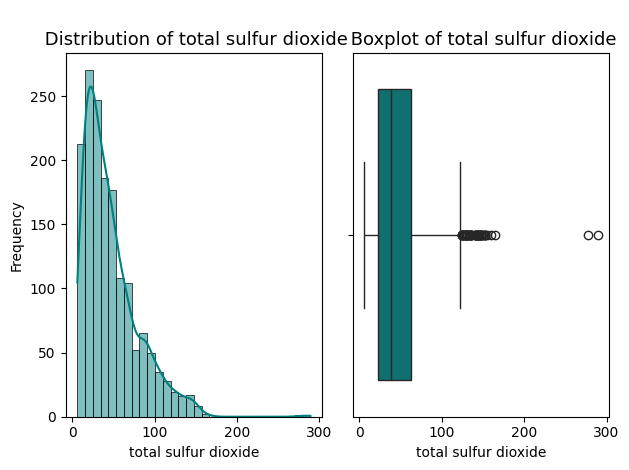


 total sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
 Feature: density
           density
count  1599.000000
mean      0.996747
std       0.001887
min       0.990070
25%       0.995600
50%       0.996750
75%       0.997835
max       1.003690

Skewness: 0.071
Kurtosis: 0.934


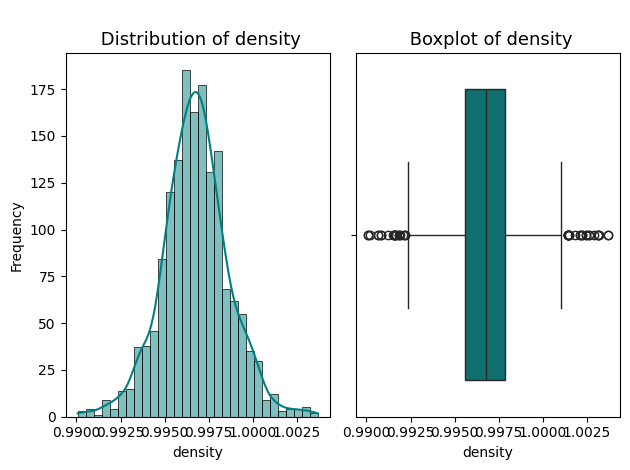

density is fairly symmetric.
 Feature: pH
                pH
count  1599.000000
mean      3.311113
std       0.154386
min       2.740000
25%       3.210000
50%       3.310000
75%       3.400000
max       4.010000

Skewness: 0.194
Kurtosis: 0.807


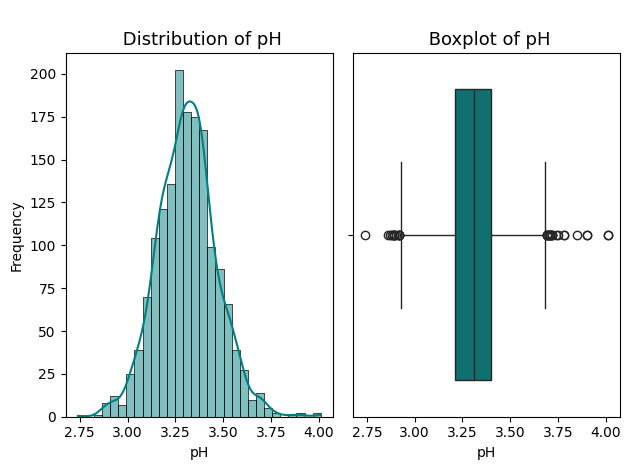

pH is fairly symmetric.
 Feature: sulphates
         sulphates
count  1599.000000
mean      0.658149
std       0.169507
min       0.330000
25%       0.550000
50%       0.620000
75%       0.730000
max       2.000000

Skewness: 2.429
Kurtosis: 11.720


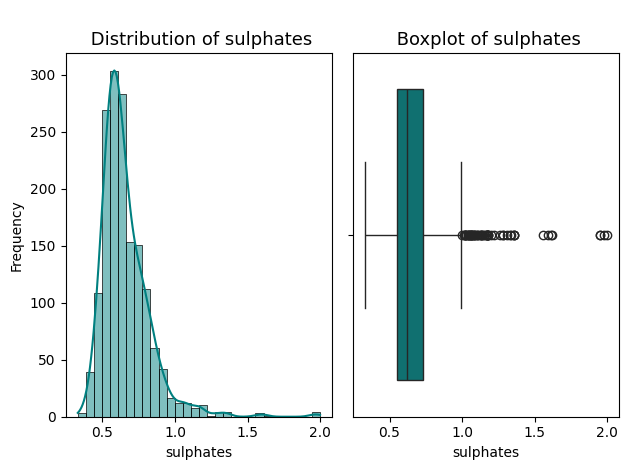


 sulphates is highly skewed. Consider log or Box-Cox transformation.
 Feature: alcohol
           alcohol
count  1599.000000
mean     10.422983
std       1.065668
min       8.400000
25%       9.500000
50%      10.200000
75%      11.100000
max      14.900000

Skewness: 0.861
Kurtosis: 0.200


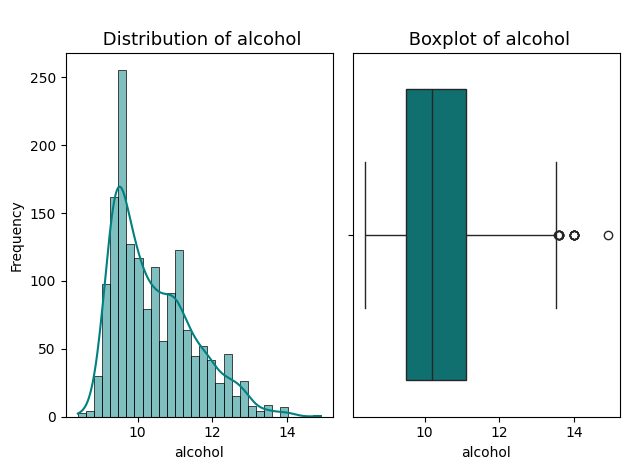

alcohol is moderately skewed.
 Feature: quality
           quality
count  1599.000000
mean      5.636023
std       0.807569
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       8.000000

Skewness: 0.218
Kurtosis: 0.297


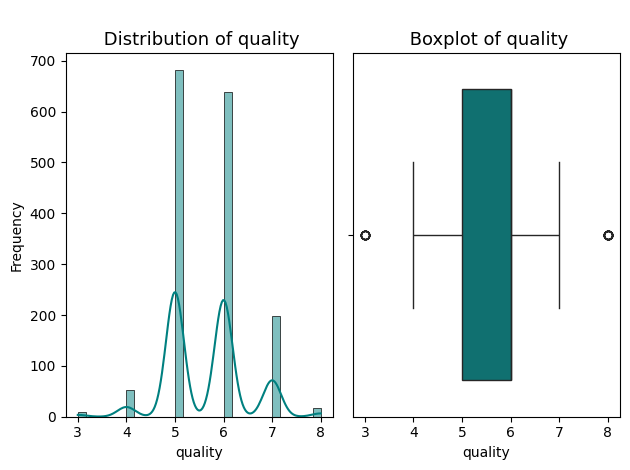

quality is fairly symmetric.


In [31]:
for col in num_features:
    univariate_numerical_eda(df, col)

In [34]:
def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

      # Frequency + proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

     # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

  # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()


In [45]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

Feature: alcohol
           Count  Percentage
alcohol                     
9.500000     139        8.69
9.400000     103        6.44
9.800000      78        4.88
9.200000      72        4.50
10.000000     67        4.19
...          ...         ...
9.950000       1        0.06
9.233333       1        0.06
9.250000       1        0.06
9.050000       1        0.06
10.750000      1        0.06

[65 rows x 2 columns]



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2263522028.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


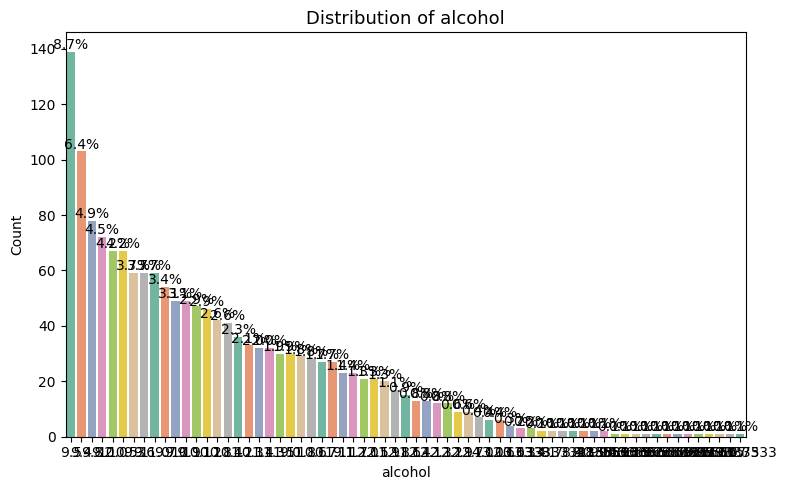

In [54]:
univariate_categorical_eda(red_wine,"alcohol" )

In [55]:
# Lets find the numerical features
num_features = red_wine.select_dtypes(include=['int64', 'float64']).columns


# convert to dataframe

num_features = pd.DataFrame(red_wine[num_features])
num_features.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [56]:

def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

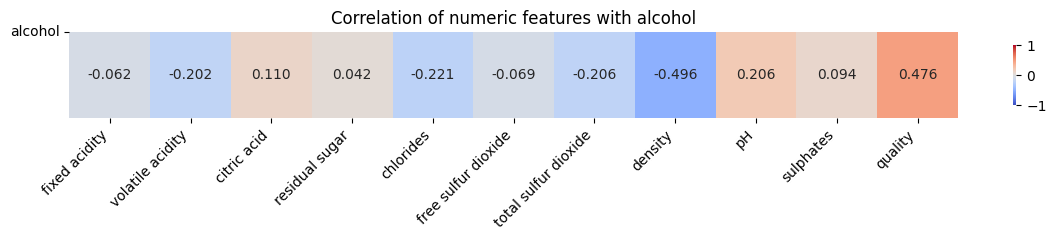

density                -0.496180
quality                 0.476166
chlorides              -0.221141
total sulfur dioxide   -0.205654
pH                      0.205633
volatile acidity       -0.202288
citric acid             0.109903
sulphates               0.093595
free sulfur dioxide    -0.069408
fixed acidity          -0.061668
residual sugar          0.042075
dtype: float64


In [59]:
corr_series = correlation_with_target(df, 'alcohol', figsize=(12,2.5))
print(corr_series) 

In [60]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

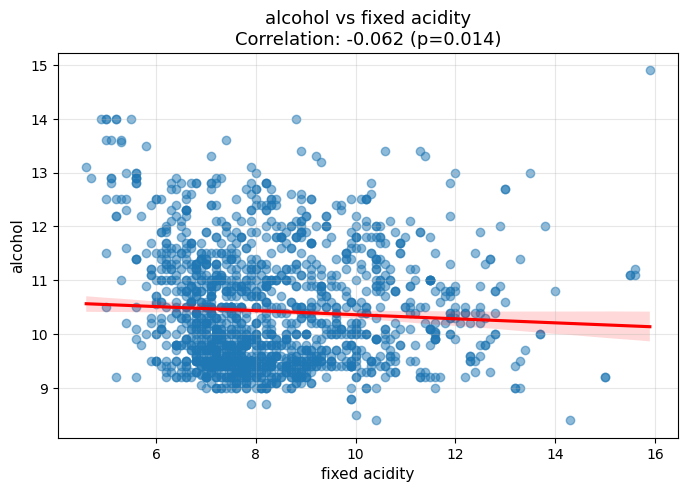

In [63]:
numeric_bivariate_plot(df,'fixed acidity', 'alcohol')


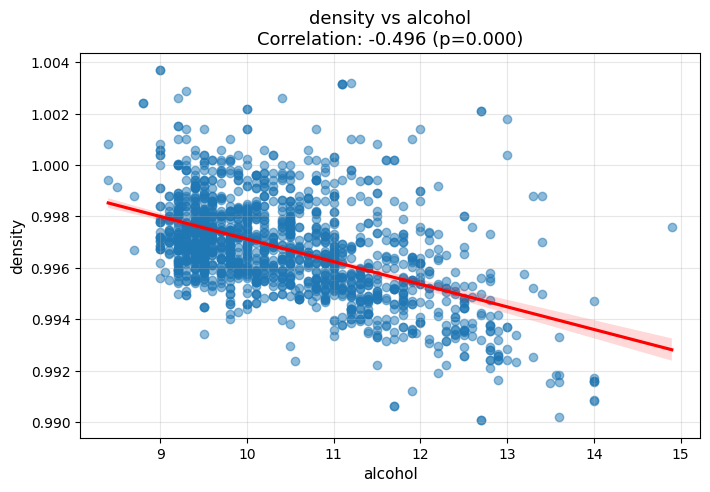

In [64]:
numeric_bivariate_plot(df, 'alcohol', 'density')

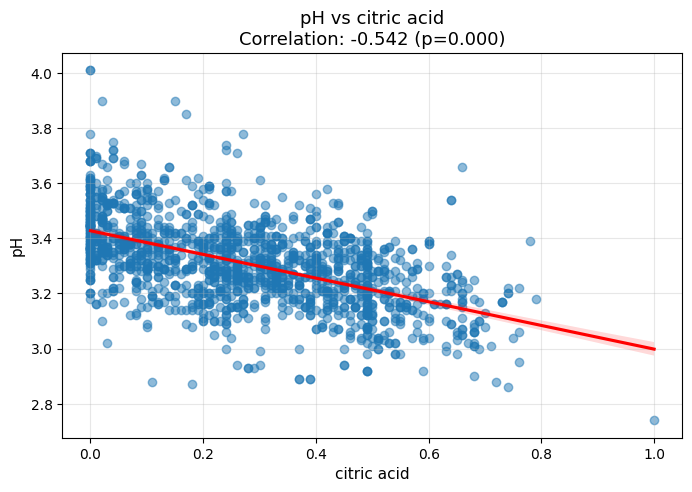

In [65]:
numeric_bivariate_plot(df, 'citric acid', 'pH')


In [66]:
def bivariate_num_cat(df, feature, target='quality_label'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = df.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

    # Violin plot for distribution shape
    plt.figure(figsize=(10,5))
    sns.violinplot(x=target, y=feature, data=df, palette='Set3')
    plt.title(f'{feature} distribution by {target}', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()


 Feature: fixed acidity vs quality
             mean       std  min   max
quality                               
3        8.360000  1.770875  6.7  11.6
4        7.779245  1.626624  4.6  12.5
5        8.167254  1.563988  5.0  15.9
6        8.347179  1.797849  4.7  14.3
7        8.872362  1.992483  4.9  15.6
8        8.566667  2.119656  5.0  12.6



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


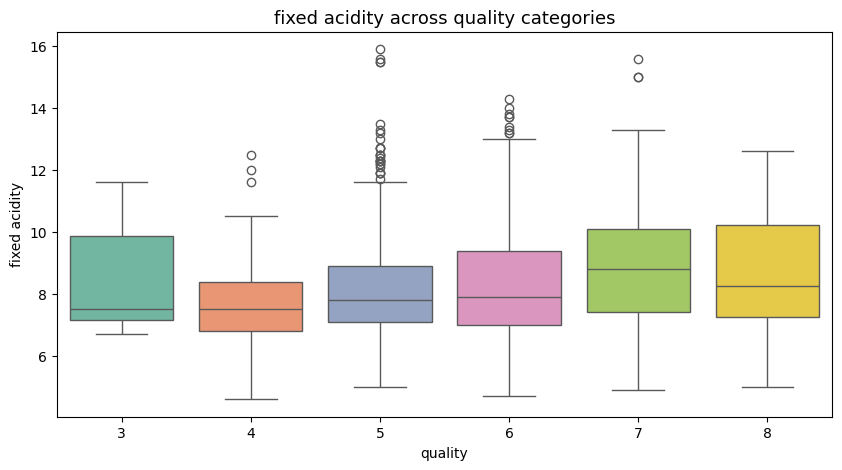

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


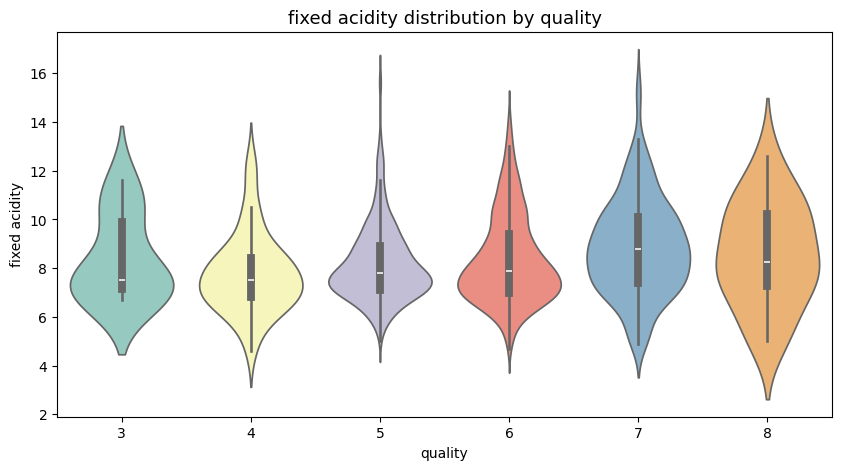

 Feature: volatile acidity vs quality
             mean       std   min    max
quality                                 
3        0.884500  0.331256  0.44  1.580
4        0.693962  0.220110  0.23  1.130
5        0.577041  0.164801  0.18  1.330
6        0.497484  0.160962  0.16  1.040
7        0.403920  0.145224  0.12  0.915
8        0.423333  0.144914  0.26  0.850



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


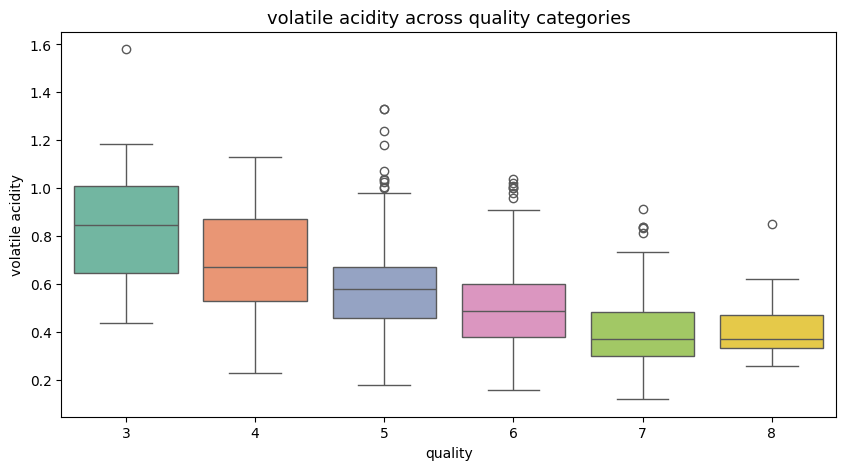

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


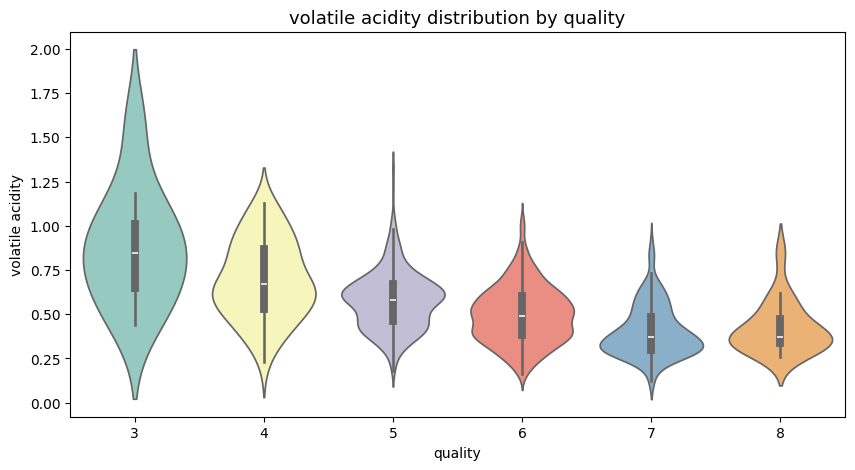

 Feature: citric acid vs quality
             mean       std   min   max
quality                                
3        0.171000  0.250664  0.00  0.66
4        0.174151  0.201030  0.00  1.00
5        0.243686  0.180003  0.00  0.79
6        0.273824  0.195108  0.00  0.78
7        0.375176  0.194432  0.00  0.76
8        0.391111  0.199526  0.03  0.72



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


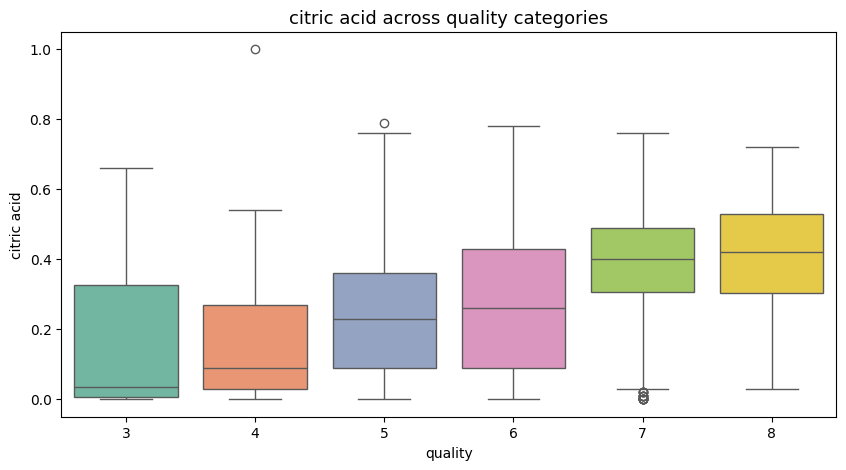

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


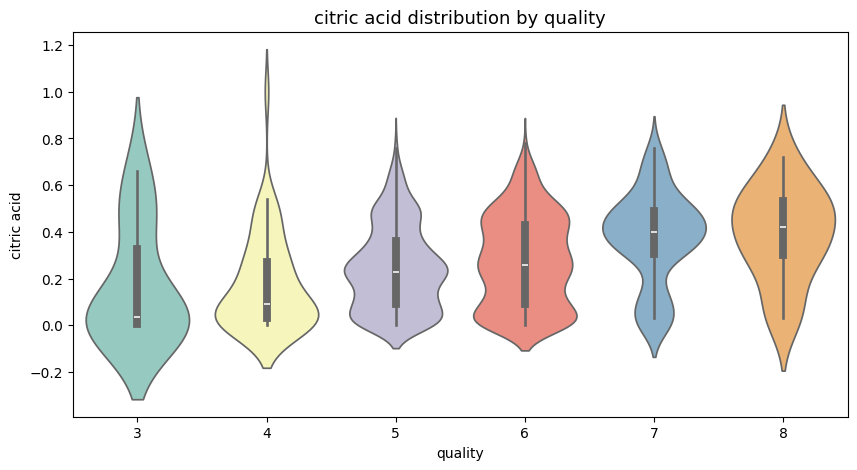

 Feature: residual sugar vs quality
             mean       std  min   max
quality                               
3        2.635000  1.401596  1.2   5.7
4        2.694340  1.789436  1.3  12.9
5        2.528855  1.359753  1.2  15.5
6        2.477194  1.441576  0.9  15.4
7        2.720603  1.371509  1.2   8.9
8        2.577778  1.295038  1.4   6.4



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


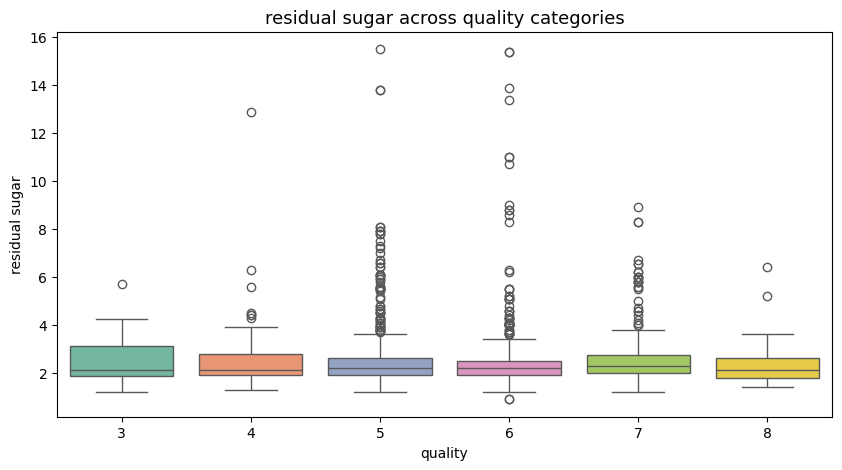

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


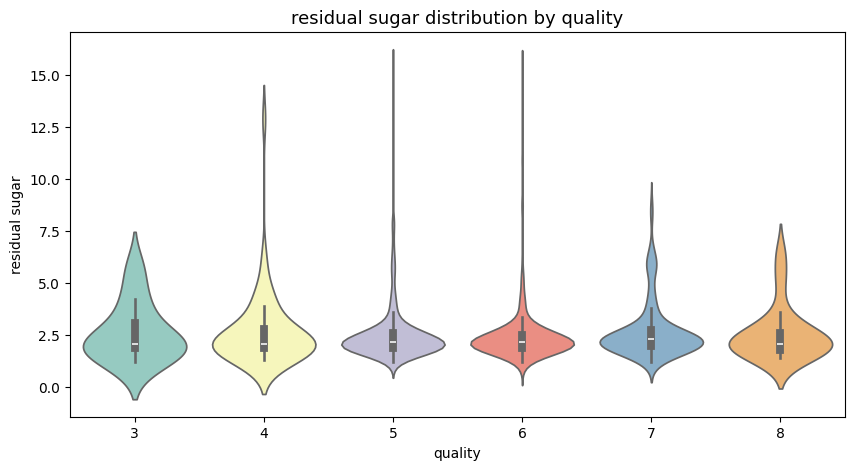

 Feature: chlorides vs quality
             mean       std    min    max
quality                                  
3        0.122500  0.066241  0.061  0.267
4        0.090679  0.076192  0.045  0.610
5        0.092736  0.053707  0.039  0.611
6        0.084956  0.039563  0.034  0.415
7        0.076588  0.029456  0.012  0.358
8        0.068444  0.011678  0.044  0.086



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


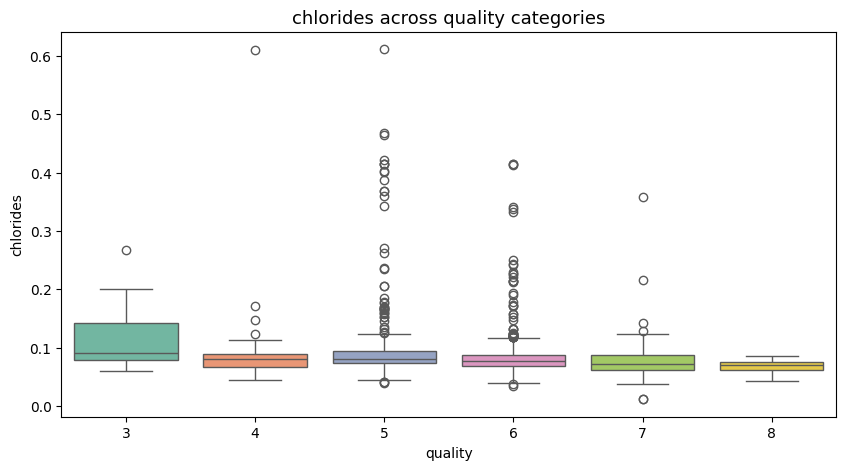

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


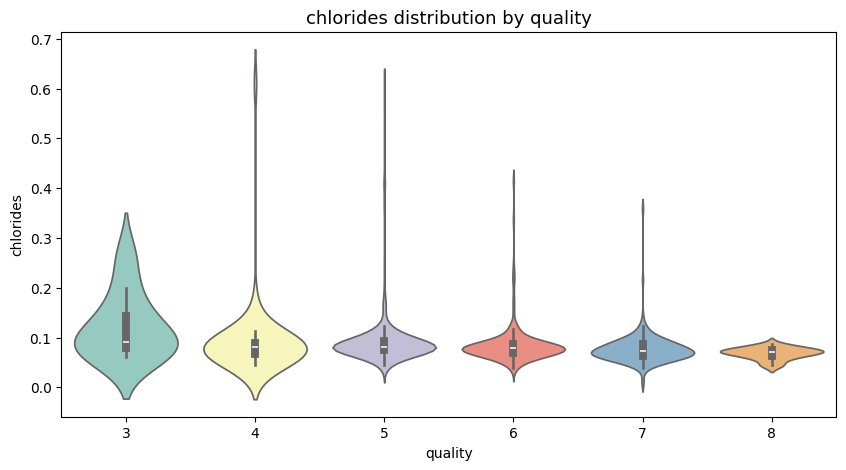

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


 Feature: free sulfur dioxide vs quality
              mean        std  min   max
quality                                 
3        11.000000   9.763879  3.0  34.0
4        12.264151   9.025926  3.0  41.0
5        16.983847  10.955446  3.0  68.0
6        15.711599   9.940911  1.0  72.0
7        14.045226  10.175255  3.0  54.0
8        13.277778  11.155613  3.0  42.0



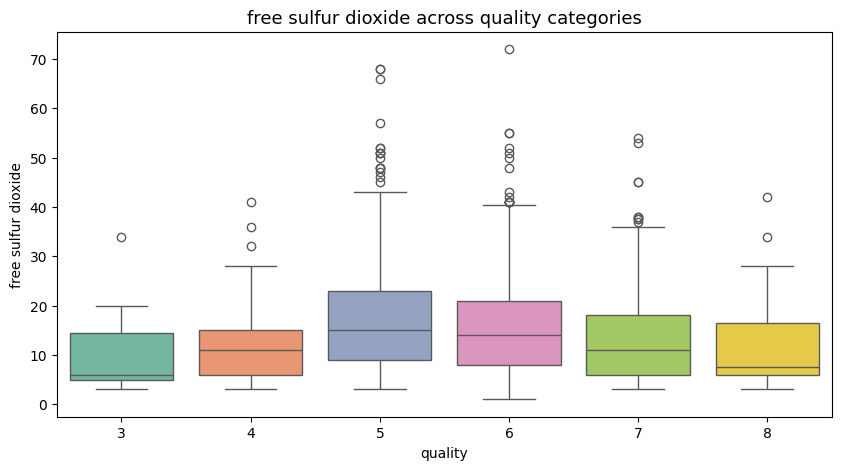

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


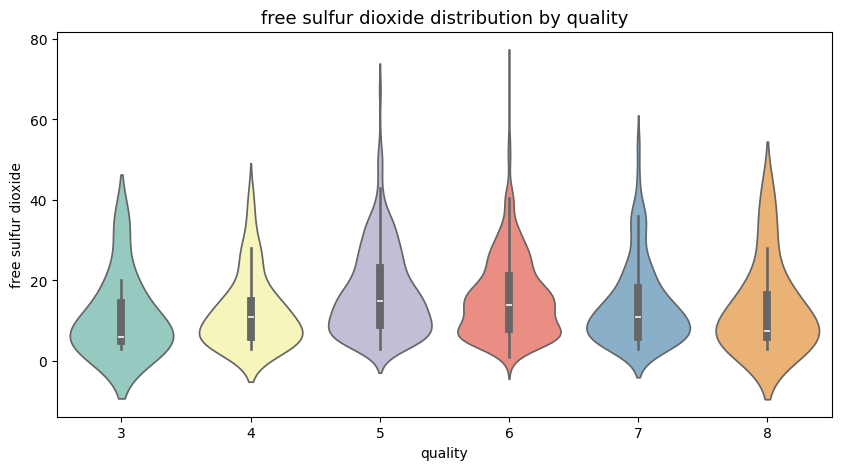

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


 Feature: total sulfur dioxide vs quality
              mean        std   min    max
quality                                   
3        24.900000  16.828877   9.0   49.0
4        36.245283  27.583374   7.0  119.0
5        56.513950  36.993116   6.0  155.0
6        40.869906  25.038250   6.0  165.0
7        35.020101  33.191206   7.0  289.0
8        33.444444  25.433240  12.0   88.0



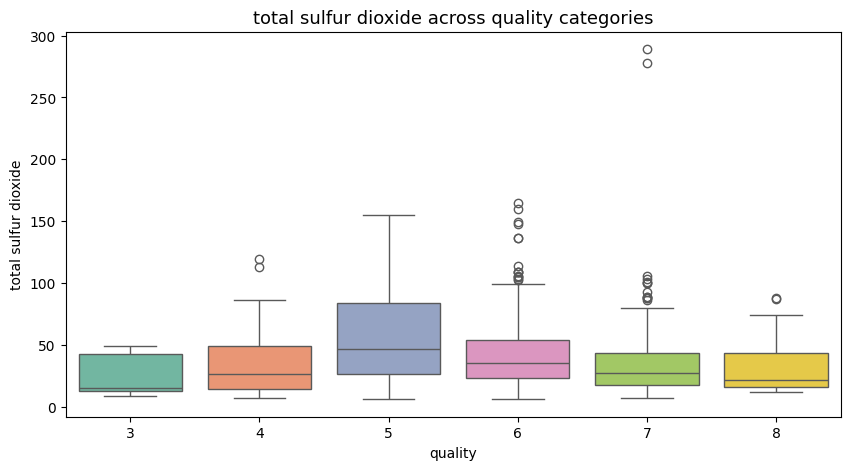

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


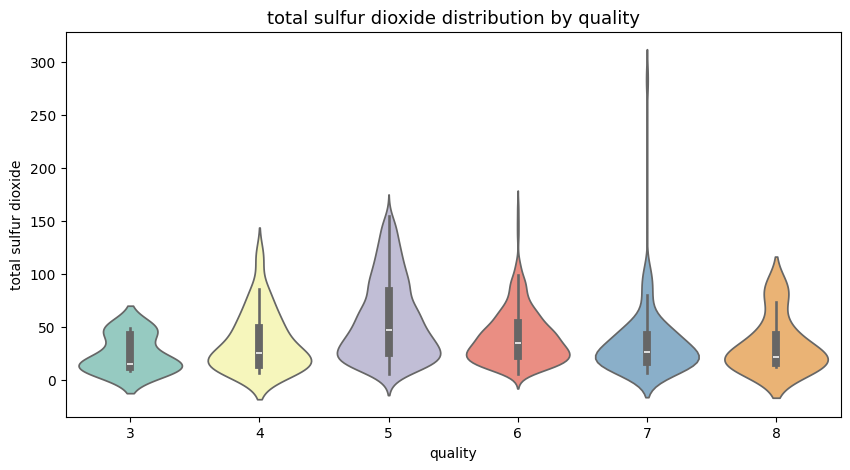

 Feature: density vs quality
             mean       std      min      max
quality                                      
3        0.997464  0.002002  0.99471  1.00080
4        0.996542  0.001575  0.99340  1.00100
5        0.997104  0.001589  0.99256  1.00315
6        0.996615  0.002000  0.99007  1.00369
7        0.996104  0.002176  0.99064  1.00320
8        0.995212  0.002378  0.99080  0.99880



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


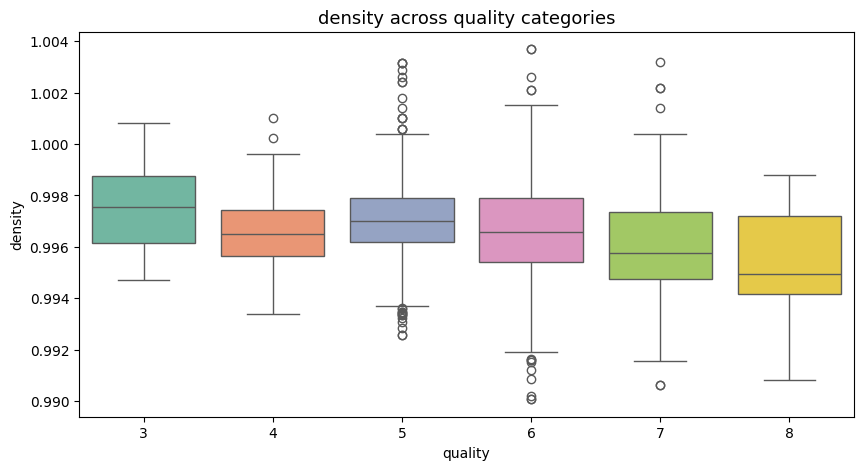

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


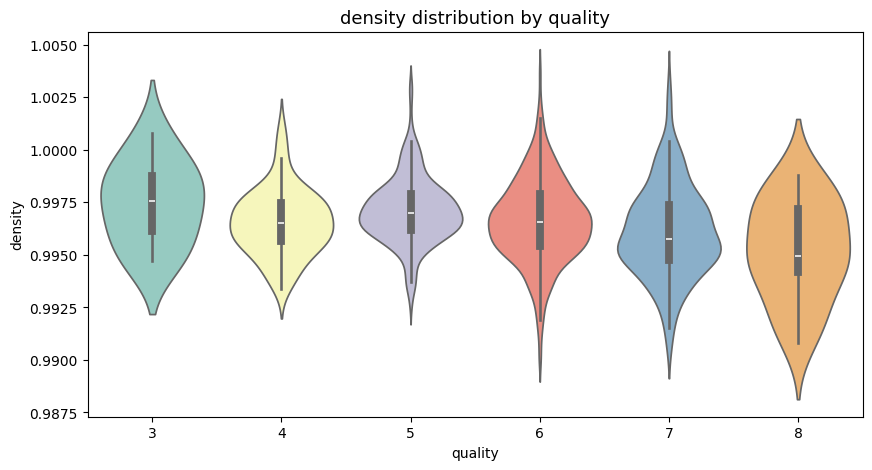

 Feature: pH vs quality
             mean       std   min   max
quality                                
3        3.398000  0.144052  3.16  3.63
4        3.381509  0.181441  2.74  3.90
5        3.304949  0.150618  2.88  3.74
6        3.318072  0.153995  2.86  4.01
7        3.290754  0.150101  2.92  3.78
8        3.267222  0.200640  2.88  3.72



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


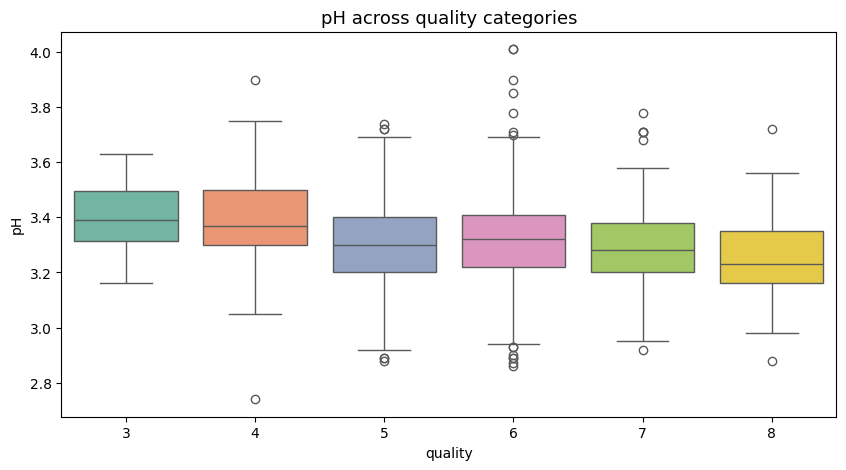

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


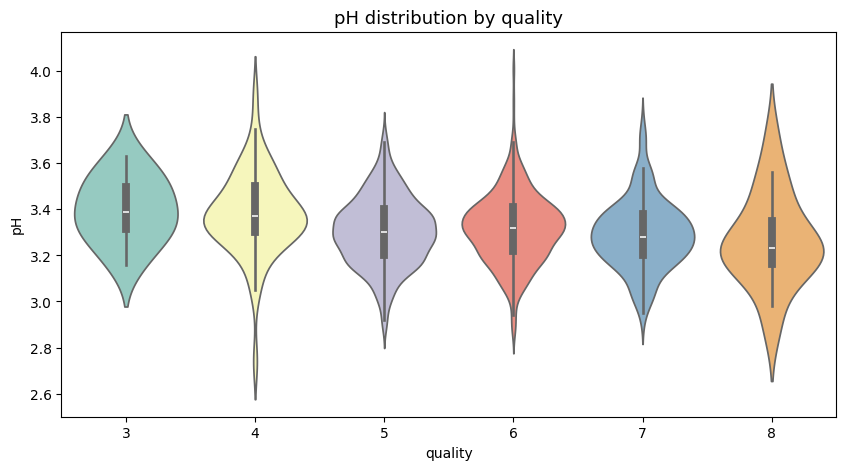

 Feature: sulphates vs quality
             mean       std   min   max
quality                                
3        0.570000  0.122020  0.40  0.86
4        0.596415  0.239391  0.33  2.00
5        0.620969  0.171062  0.37  1.98
6        0.675329  0.158650  0.40  1.95
7        0.741256  0.135639  0.39  1.36
8        0.767778  0.115379  0.63  1.10



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


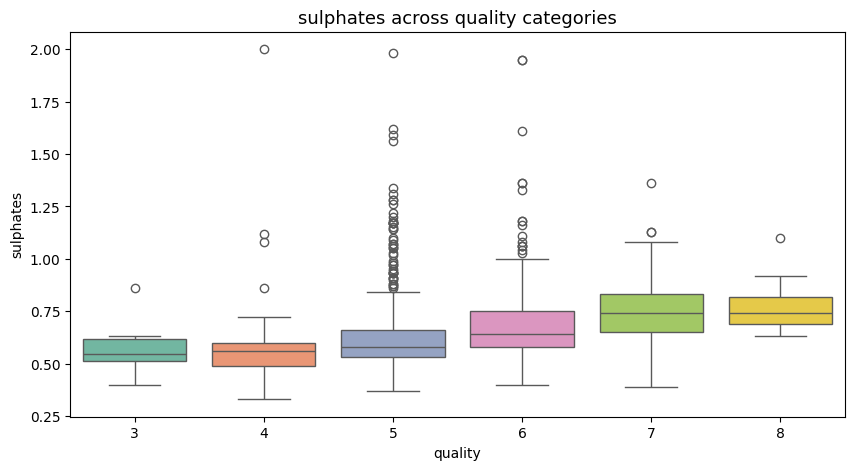

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


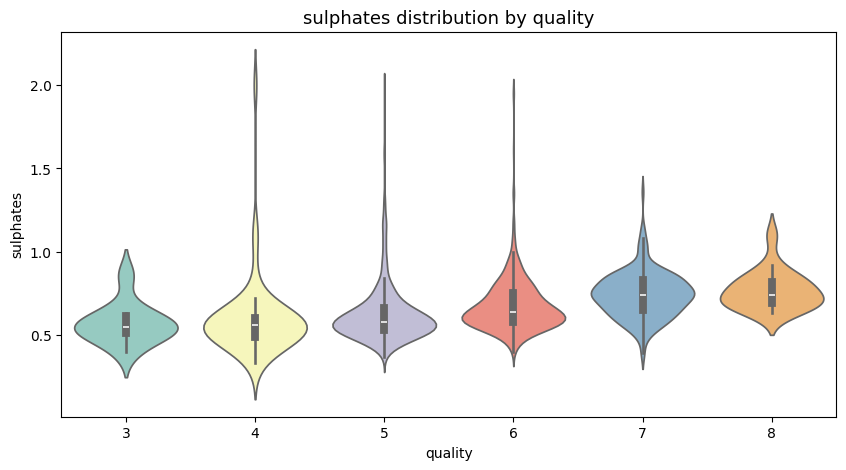

 Feature: alcohol vs quality
              mean       std  min   max
quality                                
3         9.955000  0.818009  8.4  11.0
4        10.265094  0.934776  9.0  13.1
5         9.899706  0.736521  8.5  14.9
6        10.629519  1.049639  8.4  14.0
7        11.465913  0.961933  9.2  14.0
8        12.094444  1.224011  9.8  14.0



C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


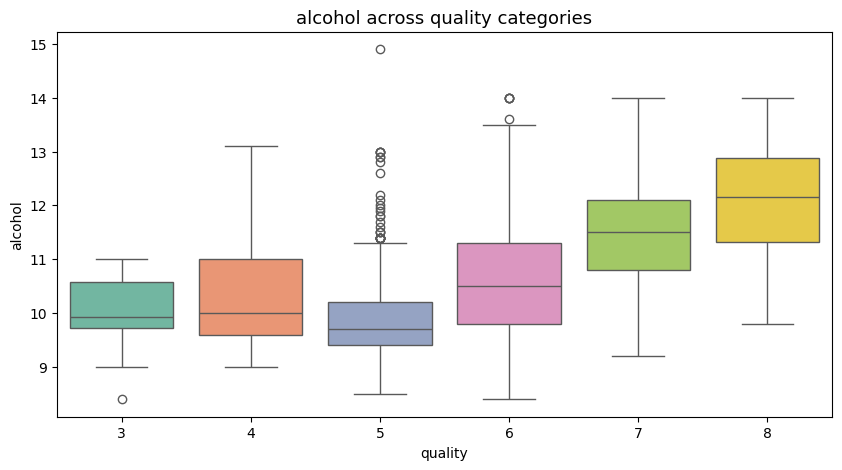

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


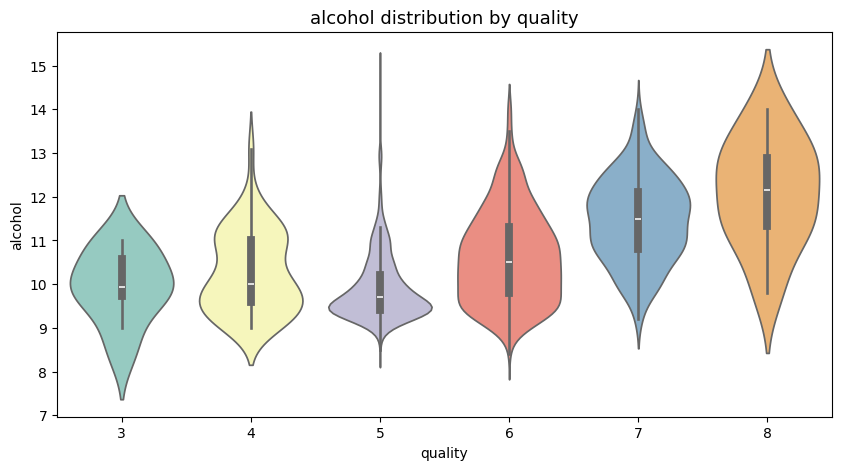

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


 Feature: quality vs quality
         mean  std  min  max
quality                     
3         3.0  0.0  3.0  3.0
4         4.0  0.0  4.0  4.0
5         5.0  0.0  5.0  5.0
6         6.0  0.0  6.0  6.0
7         7.0  0.0  7.0  7.0
8         8.0  0.0  8.0  8.0



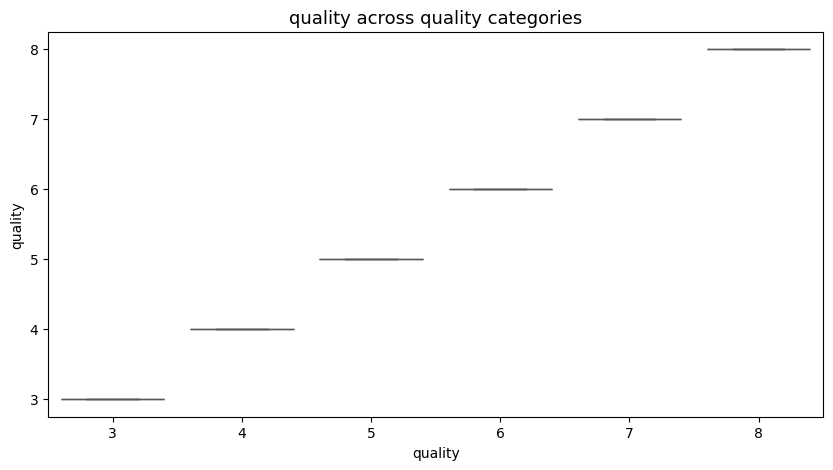

C:\Users\ncc333\AppData\Local\Temp\ipykernel_15724\2920058453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


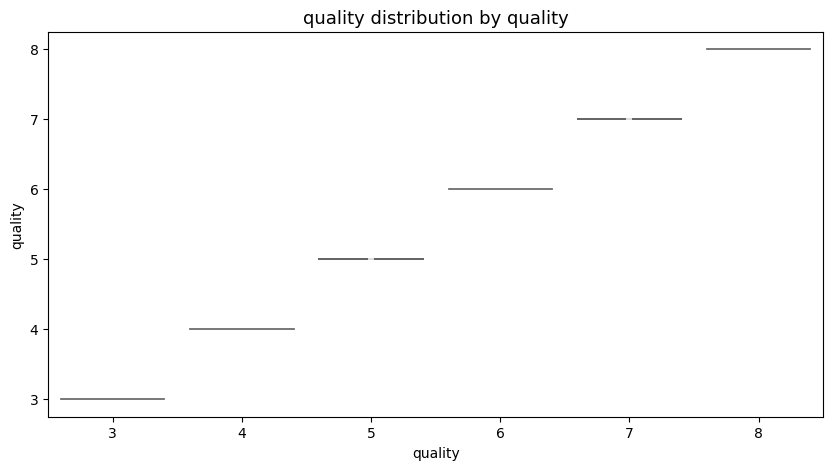

In [68]:
for col in num_features:
    bivariate_num_cat(red_wine, col, target='quality')